In [1]:
import pandas as pd
import numpy as np 

from df_information import DataFrameInfo
from data_transform import DataTransform
from df_transform import DataFrameTransform
from plotter import Plotter

### Loading variables 

In [2]:
# load the data into df
df = pd.read_csv('../loan_payments.csv')

In [3]:
# df_info contains methods that generate useful information about the DataFrame
df_info = DataFrameInfo(df)

# to do conversions on columns of data (e.g. changing its dtype, or date formats)
data_formatter = DataTransform(df)

# A df_transformer performs EDA transformations on the dataframe e.g. imputation
df_transformer = DataFrameTransform(df)

# A class to plot helpful visuals
plotter = Plotter()

DataFrameTransform loaded...


### Summary statistics 

Calling a few basic functions to get an overview of the dataframe. Calls like .head(), .info, .shape and .describe()

In [4]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [5]:
df.shape

(54231, 43)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

### Correct the column formats 

##### Dates

In [7]:
# Note how the ouptut format is 'Jan-2021'. we want it to be '2022-01-01'.
# The type of the column is also 'object', and not some kind of date.
df['issue_date'].head()

0    Jan-2021
1    Jan-2021
2    Jan-2021
3    Jan-2021
4    Jan-2021
Name: issue_date, dtype: object

In [8]:
# Columns which are currently objects, but need to be converted to dates 
object_to_date_columns = df[['issue_date', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']]

data_formatter.convert_object_columns_to_date(df, column_list=object_to_date_columns, current_format="%b-%Y")

In [9]:
# The output confirms that the format has changed.
df['last_payment_date'].head()

0   2022-01-01
1   2022-01-01
2   2021-10-01
3   2021-06-01
4   2022-01-01
Name: last_payment_date, dtype: datetime64[ns]

##### Categories 

In [10]:
# Columns which are object types, but are to be converted to categorical types
obj_into_category_columns = df[['grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'earliest_credit_line', 'application_type']]
data_formatter.convert_object_columns_into_categories(df, obj_into_category_columns)


The `term` column contains only two values: `[36 months, 60 months]`.

I will convert them to categories since no more data is to be added, and these might represent fixed categories offered by banks. 

In [11]:
df['term'] = df['term'].astype("category")

#### Integers 

In [12]:
# The following keys are the only two values. Could also simply be made categorical.
pay_plan_mapping = {'y': 1, 'n': 0}

# Replace each key with its integer value based on the above map
df['payment_plan'] = data_formatter.object_to_int(df['payment_plan'], pay_plan_mapping)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  int64         
 1   member_id                    54231 non-null  int64         
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  category      
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  category      
 9   sub_grade                    54231 non-null  category      
 10  employment_length            52113 non-null  category      
 11  home_ownership               54231 non-nu

In [14]:
# These four columns all represent a number of months, and so can be cast to int64s
float64_columns_into_int64 = df[['collections_12_mths_ex_med', 'mths_since_last_major_derog', 'mths_since_last_delinq', 'mths_since_last_record']]

df = data_formatter.convert_float64_columns_into_int64s(df, float64_columns_into_int64)

### Handle null values

I will first identify the variables with missing values and determine the percentage of missing values in each variable.

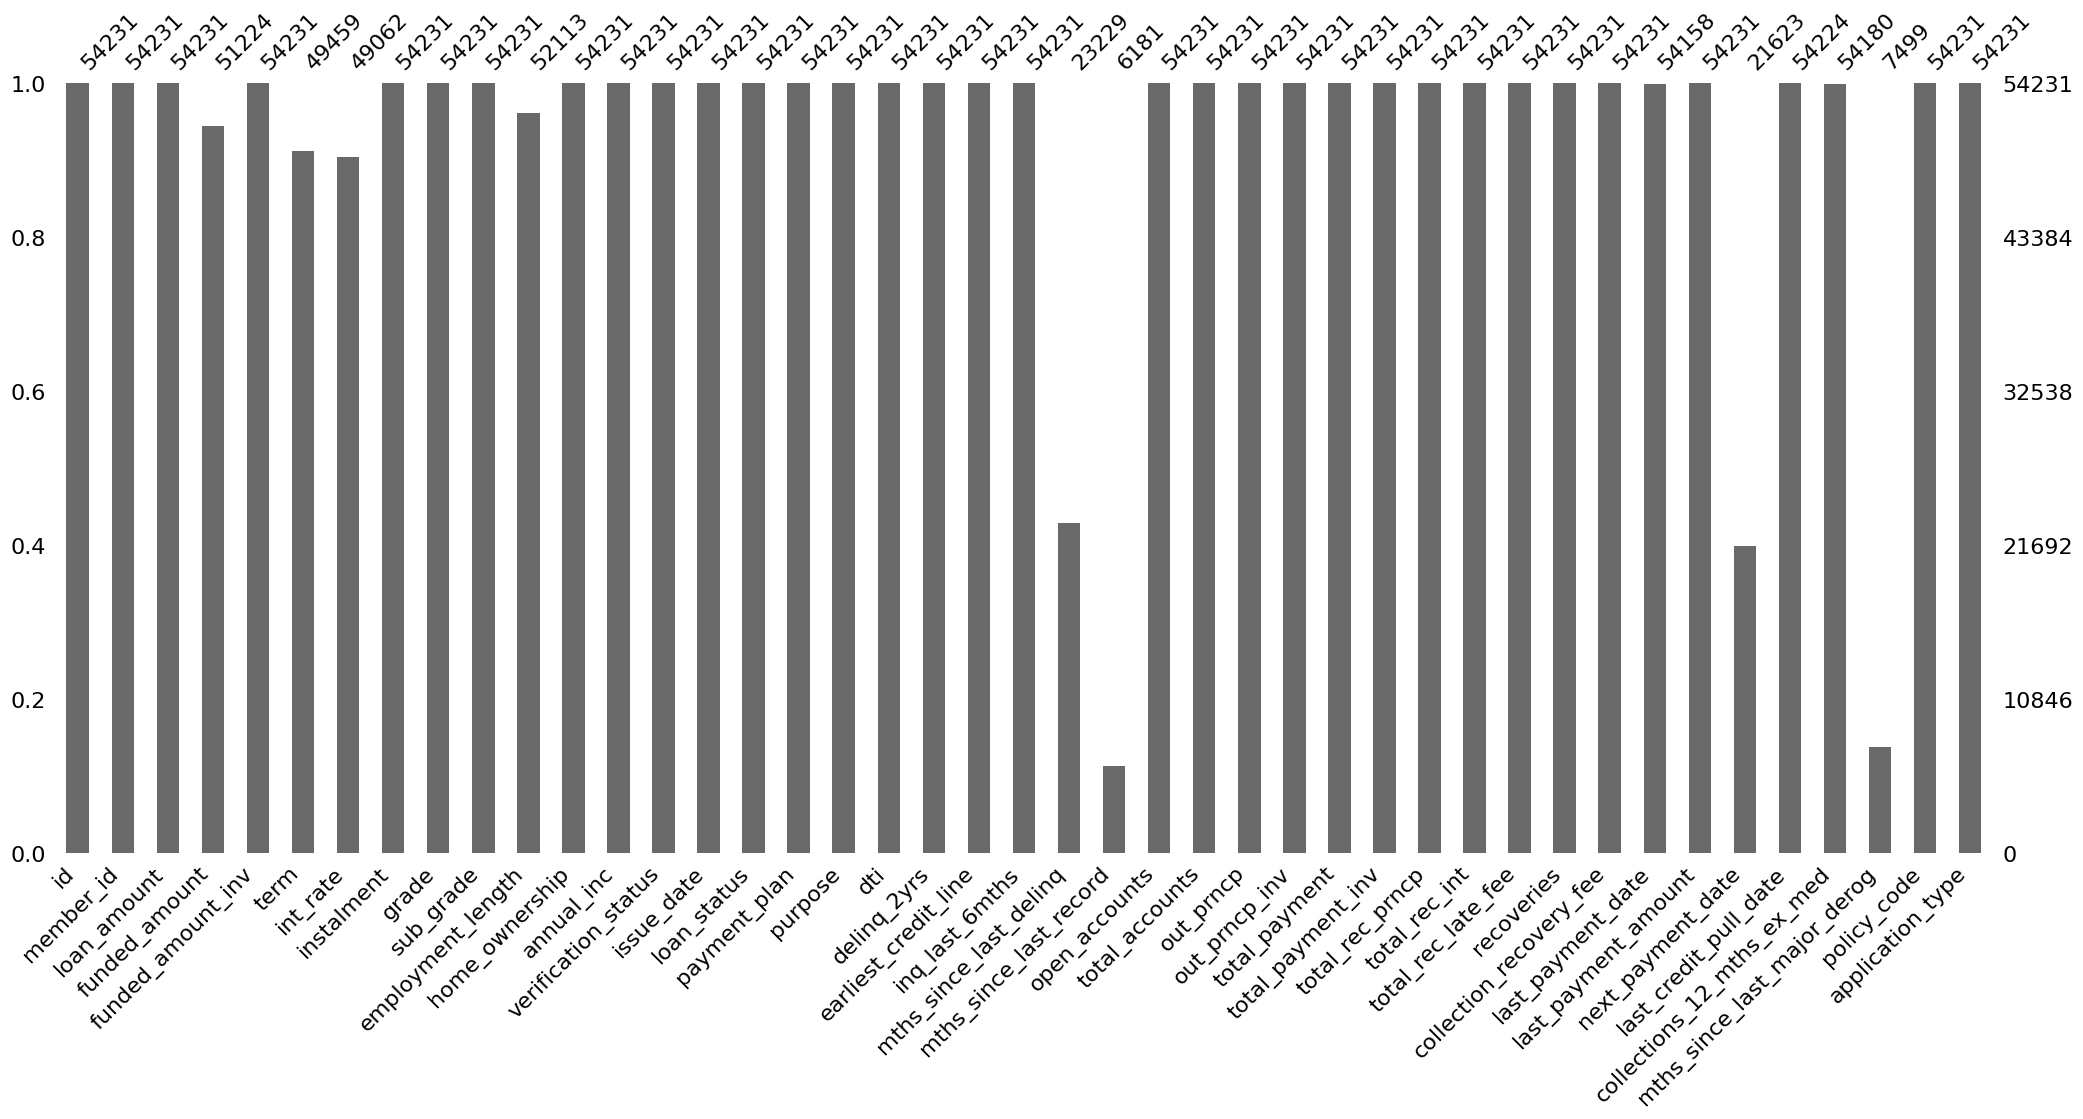

In [15]:
plot = plotter.show_null_bar_chart(df)

In [16]:

message, progress = df_info.print_null_removal_progress(df)
print(message)
progress


I have 11 columns to deal with:



,% of nulls,# of nulls,dtype
mths_since_last_record,88.60,48050,Int64
mths_since_last_major_derog,86.17,46732,Int64
next_payment_date,60.13,32608,datetime64[ns]
mths_since_last_delinq,57.17,31002,Int64
int_rate,9.53,5169,float64
term,8.80,4772,category
funded_amount,5.54,3007,float64
employment_length,3.91,2118,category
last_payment_date,0.13,73,datetime64[ns]
collections_12_mths_ex_med,0.09,51,Int64


#### Dropping columns

**I now will decide which of the above columns are worth dropping entirely, and proceed to do so.**

Based on the above there are 4 columns with very high proportions of nulls:

`[88.60%, 86.17%, 60.13%, 57.17%]`

The next biggest is 9.53%. 

As a result I am going to *remove all columns with >50% null values*.

In [17]:
# returns a series showing the % of null values for every column in the dataframe
percent_of_nulls = df_info.percentage_of_nulls_in_data_frame(df)

# Extract columns whose majority (> 50%) of values are null, to pass into drop()
more_than_half_null_cols = percent_of_nulls[percent_of_nulls > 50.00]

# Drop the selected columns in place from the dataframe
df = df_transformer.drop_columns(df, more_than_half_null_cols)

This is not to do with null handling, but I noticed that the policy_code column has a value of 1 for every single entry, so the column itself is not of any use to our analysis. 

Since we have a lot of other columns to attend to, I will drop the policy_code column to remove it from the data going forward. 

In [18]:
df = df_transformer.drop_column(df, df['policy_code'])

#### Imputing

There are **7 columns** left which contain null values: 

- `1` is of type `category`  
- `1` is of type `Int64`.
- `2` are of a `date` type. 
- `3` are of type `float64`. 

In [19]:
message, progress = df_info.print_null_removal_progress(df)
print(message)
progress

I have 7 columns to deal with:



,% of nulls,# of nulls,dtype
int_rate,9.53,5169,float64
term,8.80,4772,category
funded_amount,5.54,3007,float64
employment_length,3.91,2118,category
last_payment_date,0.13,73,datetime64[ns]
collections_12_mths_ex_med,0.09,51,Int64
last_credit_pull_date,0.01,7,datetime64[ns]


##### Mode imputations

The column `(term)` only has two values. 

- 36.0 occurs 35845 times
- 60.0 occurs 13614 times

There could be a relationship between this value and the other variables worth exploring, but for now I will impute the missing values with the mode. 

In [20]:
df['term'] = df_transformer.impute_nulls_in_column(df['term'], 'mode')

The column `employment_length` is categorical and so mode is the most appropriate replacement. 

Since ~ 4% of its values are null, doing this may skew the data. I can address this later.

In [21]:
df['employment_length'] = df_transformer.impute_nulls_in_column(df['employment_length'], 'mode')

In [22]:
message, progress = df_info.print_null_removal_progress(df)
print(message)
progress

I have 5 columns to deal with:



,% of nulls,# of nulls,dtype
int_rate,9.53,5169,float64
funded_amount,5.54,3007,float64
last_payment_date,0.13,73,datetime64[ns]
collections_12_mths_ex_med,0.09,51,Int64
last_credit_pull_date,0.01,7,datetime64[ns]


##### Median imputations

For this stage I am simply going to use the average to impute `int_rate` and `funded_amount`.

In [23]:
df['int_rate'] = df_transformer.impute_nulls_in_column(df['int_rate'], 'median')

In [24]:
df['funded_amount'] = df_transformer.impute_nulls_in_column(df['funded_amount'], 'median')

In [25]:
message, progress = df_info.print_null_removal_progress(df)
print(message)
progress

I have 3 columns to deal with:



,% of nulls,# of nulls,dtype
last_payment_date,0.13,73,datetime64[ns]
collections_12_mths_ex_med,0.09,51,Int64
last_credit_pull_date,0.01,7,datetime64[ns]


#### Dropping rows 

We have three rows left:

- The `last_credit_pull_date` column has `7` null values, or `~0.01%` of them.
- The `collections_12_mths_ex_med` column has `51` null values, or `~0.09%` of them.
- The `last_payment_date` column has `73` null values, or `~0.13%` of them

I am going to delete all of the corresponding rows. 

In [26]:
df = df_transformer.drop_rows_of_null_column_entries(df, df['last_credit_pull_date'])

df = df_transformer.drop_rows_of_null_column_entries(df, df['collections_12_mths_ex_med'])

df = df_transformer.drop_rows_of_null_column_entries(df, df['last_payment_date'])

#### Confirm all nulls removed 

In [27]:
message, progress = df_info.print_null_removal_progress(df)
print(message)
progress

I have 0 columns to deal with:



,% of nulls,# of nulls,dtype


<Axes: >

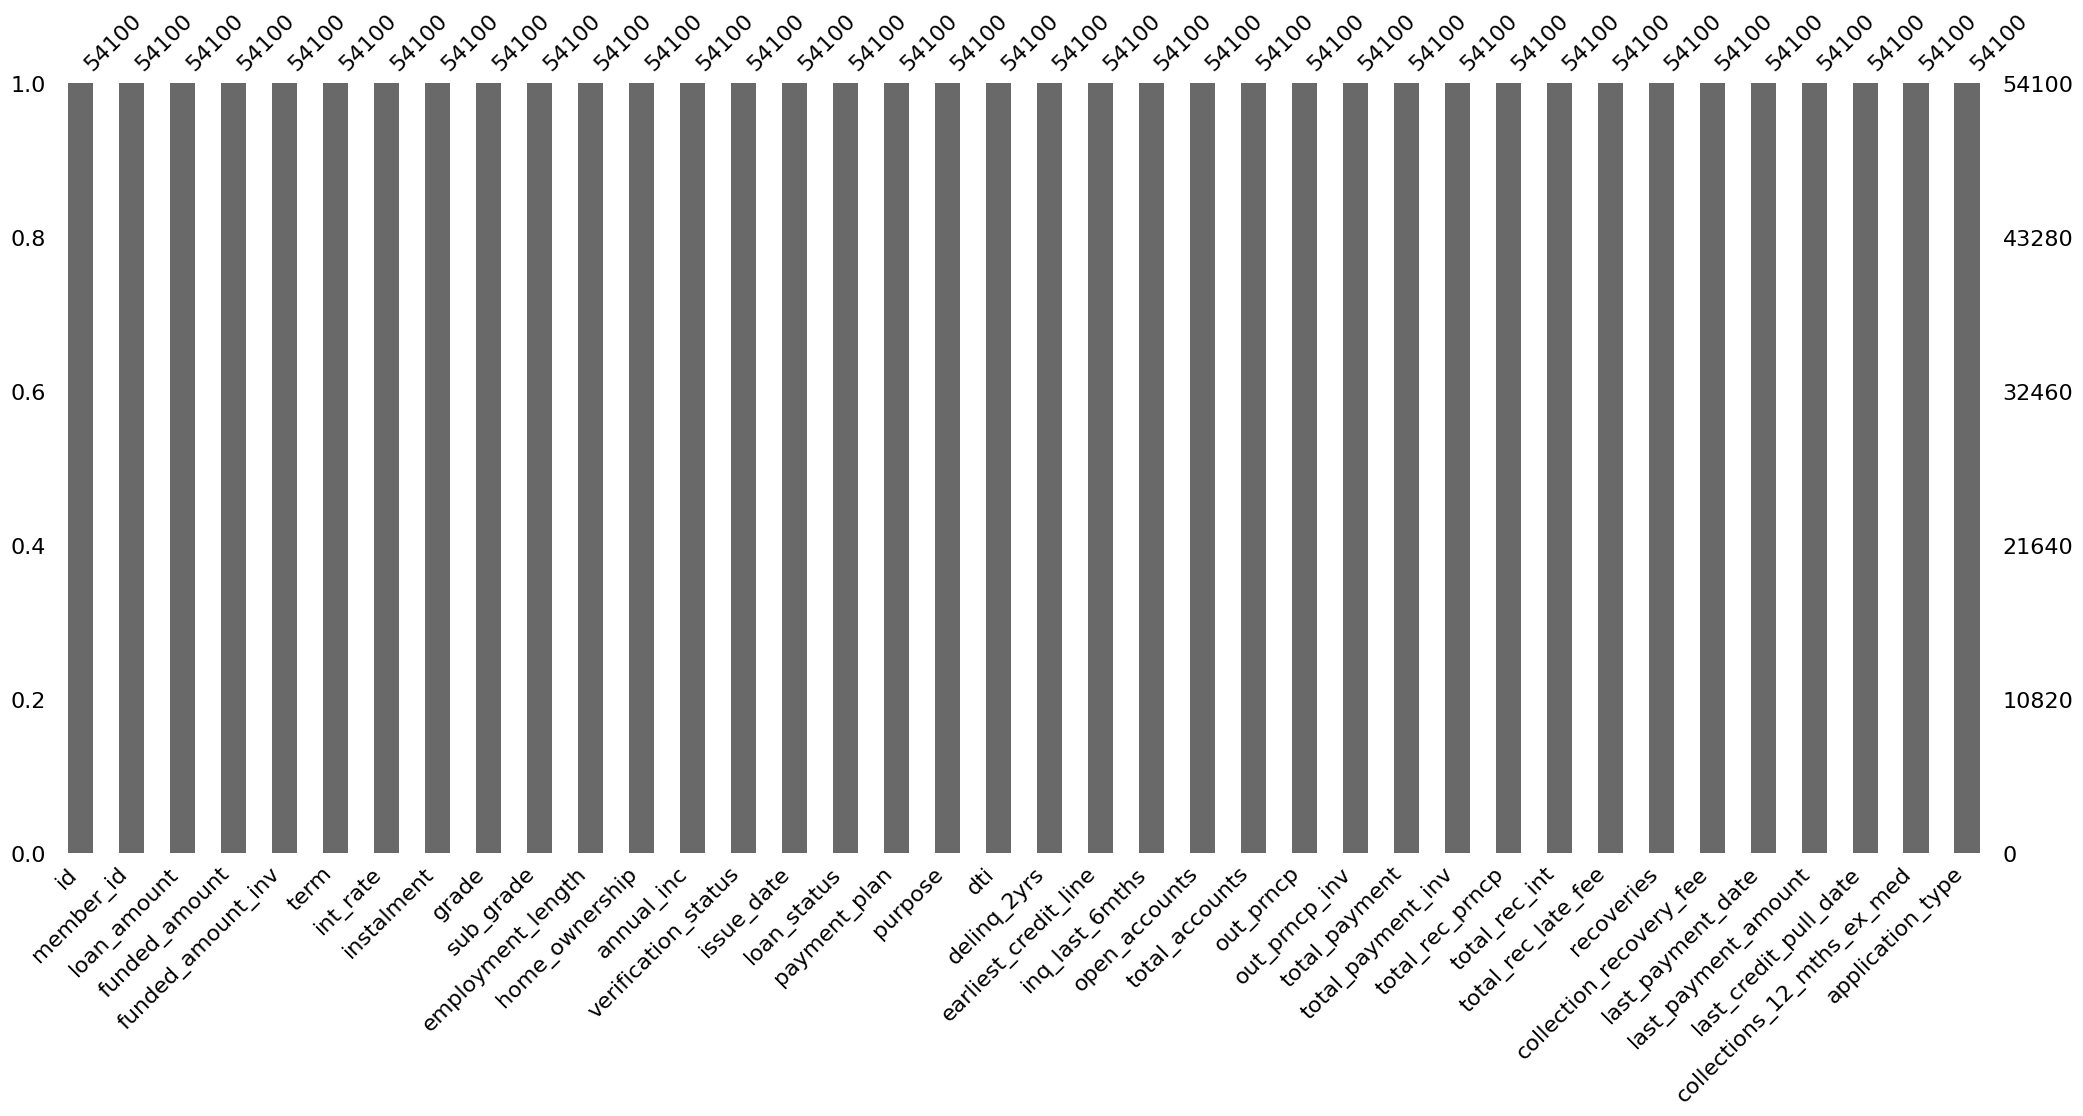

In [28]:
plotter.show_null_bar_chart(df)

### Skewed data

Lets first look at the skew value for each of the columns

In [29]:
skew_series = df_info.measure_skew_for_all_columns(df).sort_values(ascending=False)
data = df_info.print_skew_and_dtype(df)
data

,skewness,dtype
payment_plan,232.594067,int64
collection_recovery_fee,27.794716,float64
collections_12_mths_ex_med,20.298064,Int64
recoveries,14.382675,float64
total_rec_late_fee,13.258472,float64
annual_inc,8.735737,float64
delinq_2yrs,5.318818,int64
inq_last_6mths,3.243836,int64
last_payment_amount,2.496079,float64
id,2.369415,int64


In order to decide a cut off point for considering a column as skewed, I will look into those which appear to be normally distributed. 

The table above shows the skewness of the numeric features, sorted with the highest first. 

The closer a skew value is to 0, the more normally distributed it is; those lower in the table have the least skew.

To determine a cuttoff point for skewness I will look at the kde histplot for each of the last 4 values in the table, focusing on how the rise in the skew value affects the extend of the skew. 

In [54]:
last_four_skewed_columns = data.tail(4)
last_four_skewed_columns

,skewness,dtype
loan_amount,0.804312,int64
total_accounts,0.780083,int64
int_rate,0.456055,float64
dti,0.189020,float64


In [73]:
last_four_names = [str(col_name) for col_name in last_four_skewed_columns.index]
last_four_names
    

['loan_amount', 'total_accounts', 'int_rate', 'dti']

skewness
dtype


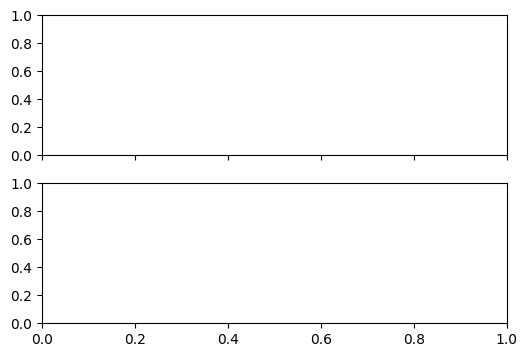

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
df1 = last_four_skewed_columns

n = len(df1.columns)

fig, ax = plt.subplots(n,1, figsize=(6,n*2), sharex=True)
for i in range(n):
    plt.sca(ax[i])
    col = df1.columns[i]
    print(col)
    # sns.histplot(df1[col].values)
    # ylabel(col);

<Axes: xlabel='funded_amount', ylabel='Count'>

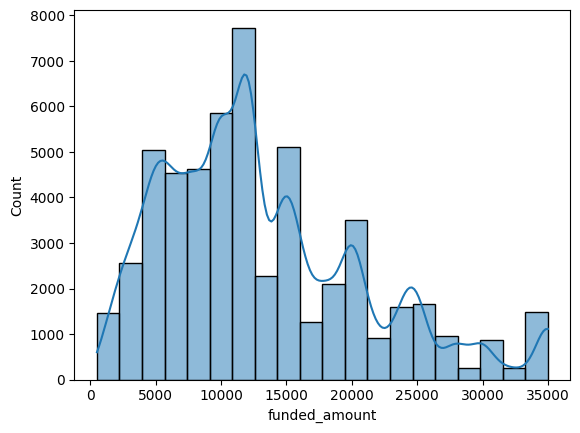

In [39]:
plotter.histogram(df['funded_amount'], 20, True)

<Axes: xlabel='open_accounts', ylabel='Count'>

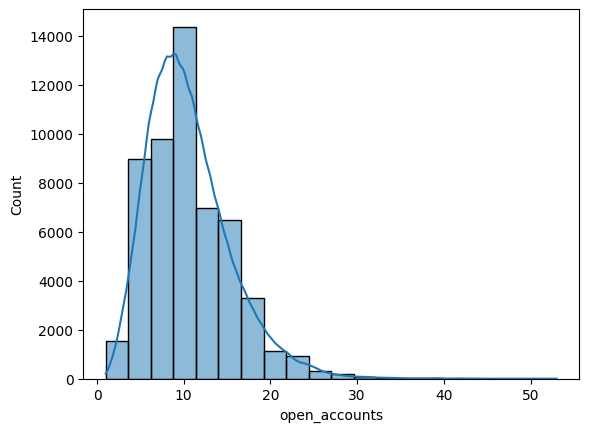

In [ ]:
plotter.histogram(df['open_accounts'], 20, True)

<Axes: xlabel='open_accounts', ylabel='Count'>

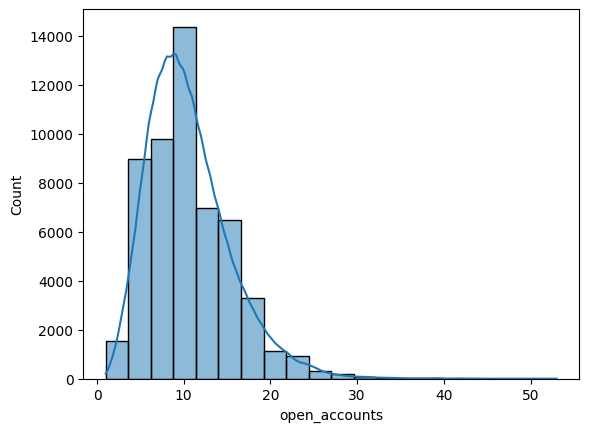

In [ ]:
plotter.histogram(df['open_accounts'], 20, True)

I am going to generate histograms for a few of the above. 

The column member_id has skew value: 2.204548677177018


<Axes: xlabel='member_id', ylabel='Count'>

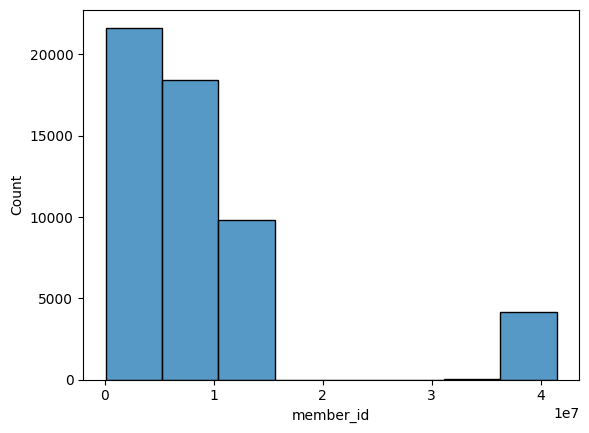

In [32]:
index_list = [0, 2, 8, 12]
index = index_list[3]
skew_value = skew_series[index]
skew_column_name: str = list(skew_series.index)[index]
print(f"The column {skew_column_name} has skew value: {skew_value}")
column_data = df[skew_column_name]
p = plotter.histogram(column_data, 8)
p

In [33]:

# threshold = 2
# skew_series = skew_series[skew_series[skew_series > threshold].index]

# plotter.plot_scatter_matrix(df)

In [34]:
# visualise the most skew 
# skew, ax = plotter.plot_skew_by_column_name(df,'funded_amount')
# print(f"Skew {skew}")
# ax